In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import decomposition, preprocessing, svm 

import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [2]:
# Load dataset
lung_data = pd.read_csv("data//lung_cancer.csv")
lung_data.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [3]:
# Delete the Name and Surname columns
del lung_data['Name']
del lung_data['Surname']

In [4]:
lung_data.tail()

,Age,Smokes,AreaQ,Alkhol,Result
54,26,13,6,1,0
55,77,20,5,4,1
56,75,15,3,5,1
57,43,30,3,8,1
58,51,25,9,0,0


In [5]:
# Shape 
print(lung_data.shape)

(59, 5)


In [6]:
# Statistical description
lung_data.describe()

# From this, can tell that there is no missing data

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [7]:
# Class distribution to see how many are prone to heart attacks by the 'num' feature
print(lung_data.groupby('Result').size())

Result
0    31
1    28
dtype: int64


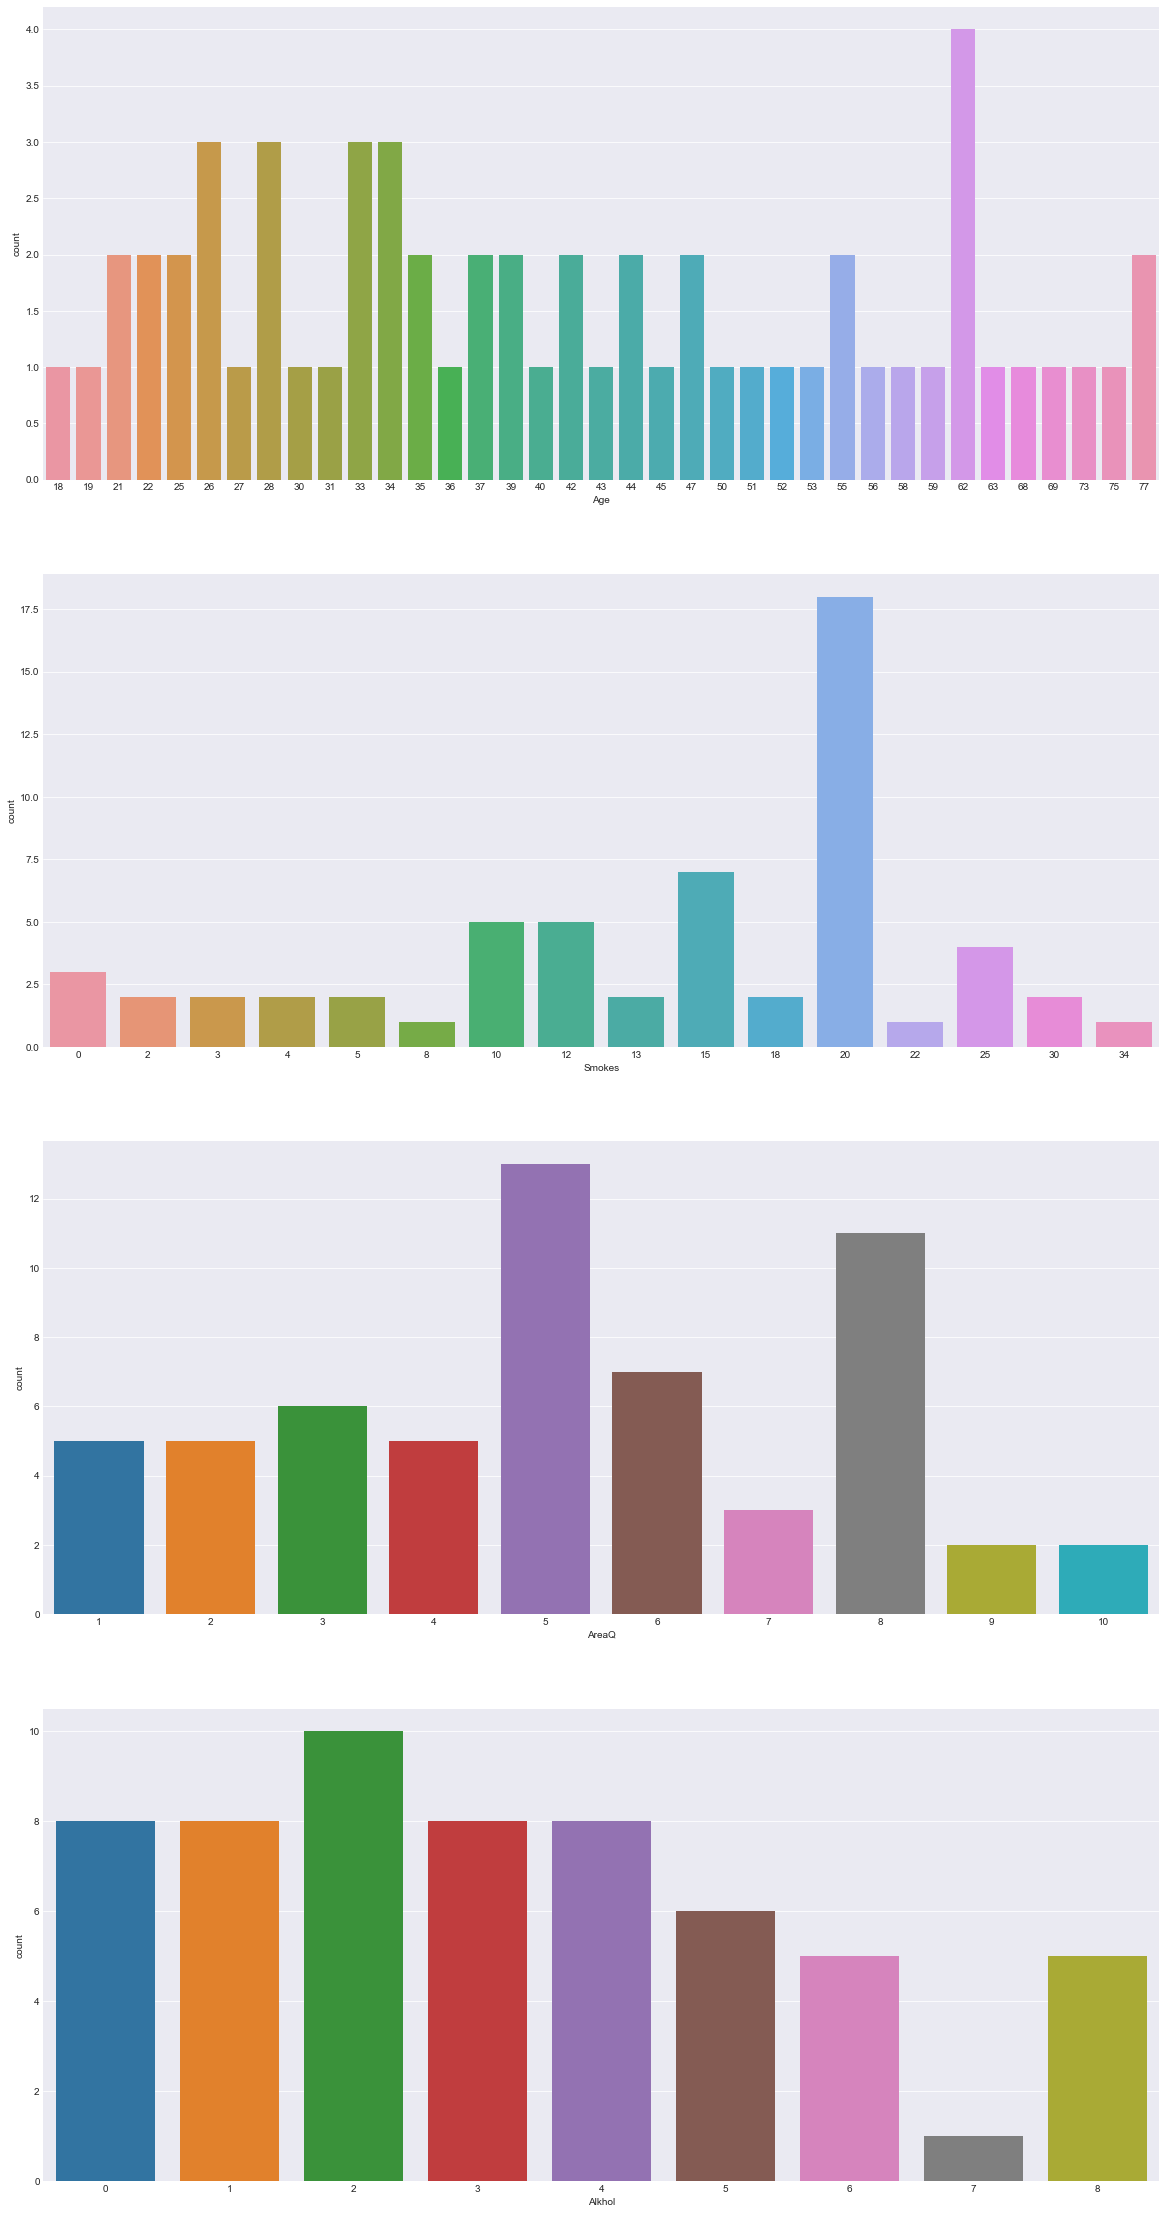

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,40))
sns.countplot(x='Age', data=lung_data, ax=ax1)
sns.countplot(x='Smokes', data=lung_data, ax=ax2)
sns.countplot(x='AreaQ', data=lung_data, ax=ax3)
sns.countplot(x='Alkhol', data=lung_data, ax=ax4)

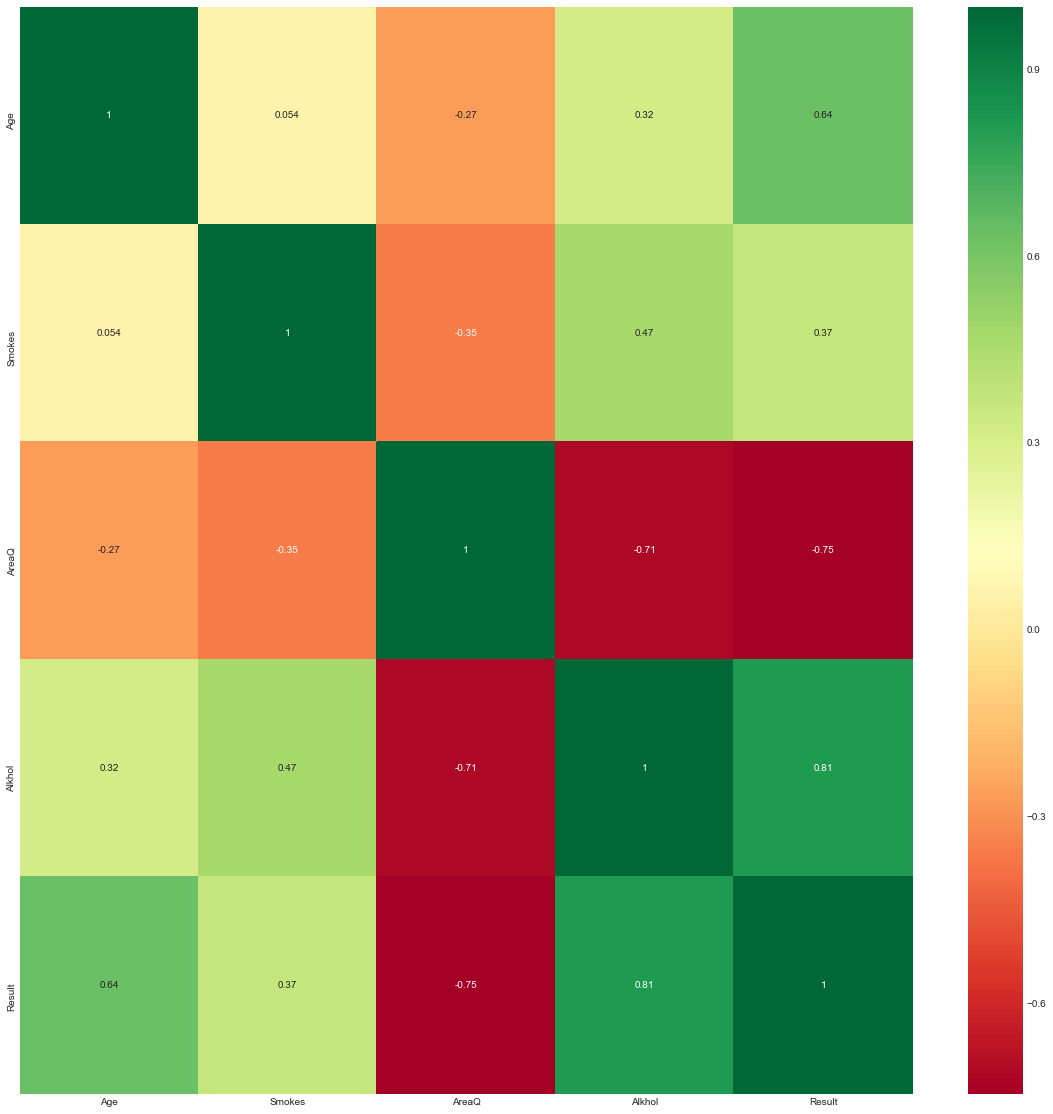

In [9]:
# data = pd.read_csv("new_heart_attack.csv")

# Features
X = lung_data.iloc[:,0:4]  
# Classes / target
y = lung_data.iloc[:,-1]    

# Get correlations of each features in dataset
corrmat = lung_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(lung_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Last row i.e Result, 
# Result is correlated with other features, 
# the features in order of correlation with Result are: 
# -- Alkhol (0.81)
# -- AreaQ (-0.75)
# -- Age (0.64)
# -- Smokes (0.37)

# All the features are not insignificant enough to remove - hence I will not delete any feature.

In [10]:
#Shuffle the data 
np.random.seed(18)
lung_data_shuffle = lung_data.iloc[np.random.permutation(len(lung_data))]

In [11]:
lung_data_shuffle.columns

Index(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [12]:
# Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn
all_data = lung_data_shuffle[['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result']].values

# Create array of only the feature data 
features = lung_data_shuffle[['Age', 'Smokes', 'AreaQ', 'Alkhol']].values

# Separate array to contain target
results = lung_data_shuffle['Result'].values

# Also need array of the feature names - this will help later when exploring the data
feature_names = ['Age', 'Smokes', 'AreaQ', 'Alkhol']

# print the features array of feature data
features

array([[37, 10,  5,  3],
       [25, 20,  8,  2],
       [56, 20,  3,  3],
       [22, 12,  5,  2],
       [22, 20,  6,  2],
       [25,  2,  5,  1],
       [21, 20,  5,  3],
       [50, 20,  2,  4],
       [40, 20,  2,  7],
       [55, 15,  1,  3],
       [53, 20,  6,  3],
       [42, 22,  3,  5],
       [43, 30,  3,  8],
       [55, 20,  1,  4],
       [47, 12,  8,  0],
       [26, 13,  6,  1],
       [28, 10,  4,  1],
       [62, 25,  3,  4],
       [44, 30,  1,  6],
       [37, 15,  6,  2],
       [39, 15,  7,  2],
       [44,  5,  8,  1],
       [36, 13,  5,  2],
       [33, 25,  8,  2],
       [39, 18,  8,  1],
       [34, 12,  8,  0],
       [63, 20,  4,  5],
       [47, 15,  1,  8],
       [62, 15,  5,  5],
       [35,  3,  5,  4],
       [62,  5,  4,  3],
       [26, 34,  1,  8],
       [28, 20,  2,  8],
       [21, 20,  8,  3],
       [58, 15, 10,  0],
       [34, 25,  4,  8],
       [35, 20,  5,  1],
       [52, 18,  4,  5],
       [28,  0,  8,  1],
       [27, 20,  2,  5],


In [13]:
# Save the new heart attack data csv
df = pd.DataFrame(all_data, columns = ['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'])

df.to_csv('new_lung_cancer.csv')

In [14]:
# Normalize the attribute data using preprocessing.StandardScaler() 
# Normalization means adjusting values measured on different scales to a common scale
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

# scaler has calculated the mean and scaling factor to standardize each feature

array([[-0.34957441, -0.64014396, -0.08332128, -0.10053487],
       [-1.09505236,  0.62301636,  1.14566759, -0.52421755],
       [ 0.83076568,  0.62301636, -0.9026472 , -0.10053487],
       [-1.28142185, -0.3875119 , -0.08332128, -0.52421755],
       [-1.28142185,  0.62301636,  0.32634168, -0.52421755],
       [-1.09505236, -1.65067222, -0.08332128, -0.94790023],
       [-1.34354501,  0.62301636, -0.08332128, -0.10053487],
       [ 0.45802671,  0.62301636, -1.31231015,  0.32314781],
       [-0.16320492,  0.62301636, -1.31231015,  1.59419585],
       [ 0.76864252, -0.0085638 , -1.72197311, -0.10053487],
       [ 0.6443962 ,  0.62301636,  0.32634168, -0.10053487],
       [-0.03895859,  0.87564843, -0.9026472 ,  0.74683049],
       [ 0.02316457,  1.88617669, -0.9026472 ,  2.01787853],
       [ 0.76864252,  0.62301636, -1.72197311,  0.32314781],
       [ 0.27165722, -0.3875119 ,  1.14566759, -1.37158291],
       [-1.0329292 , -0.26119586,  0.32634168, -0.94790023],
       [-0.90868287, -0.

In [15]:
scaler_mean = scaler.mean_
scaler_mean

array([42.62711864, 15.06779661,  5.20338983,  3.23728814])

In [16]:
scaler_scale = scaler.scale_  
scaler_scale

array([16.09705553,  7.91665142,  2.44103105,  2.36025697])

In [17]:
# Split the data into the sets for training and testing 
import numpy
from sklearn.model_selection import train_test_split
    
seed = 18

(training_inputs,
 testing_inputs,
 training_results,
 testing_results) = train_test_split(features_scaled, 
                                     results, 
                                     test_size=0.20, 
                                     train_size=0.80, 
                                     random_state=seed)


In [18]:
# DecisionTreeClassifier, fit to training data
clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_results)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

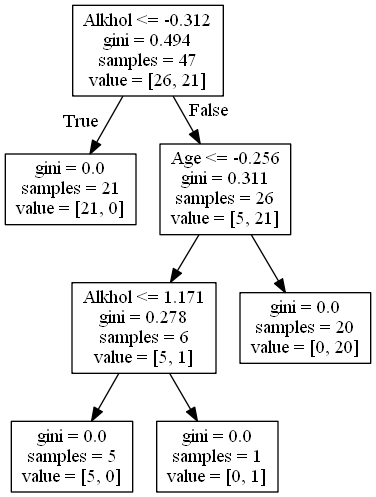

In [19]:
# Display the resulting decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [20]:
# Using test data to measure the accuracy of the decision tree model 
clf.score(testing_inputs, testing_results)

0.8333333333333334

In [21]:
# Using K-Fold cross validation to measure of your model's accuracy (K=10)
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
cv_scores.mean()

0.949047619047619

In [22]:
# Using RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
cv_scores.mean()

0.949047619047619

In [23]:
# SVM
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

cv_scores = cross_val_score(svc, features_scaled, results, cv=10)

cv_scores.mean()

0.9666666666666668

In [24]:
# KNeighborsClassifier
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)

cv_scores.mean()

0.9833333333333334

In [25]:
# Trying different values of K for KNN 
# Using for loop to run KNN with K values ranging from 1 to 10 
# See if K makes a substantial difference. 

for i in range(1, 10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
    print (i, cv_scores.mean())
    
# Same

1 0.9833333333333334
2 0.9666666666666666
3 0.9833333333333334
4 0.9666666666666666
5 0.9833333333333334
6 0.9833333333333334
7 0.9833333333333334
8 0.9833333333333334
9 0.9833333333333334


In [26]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, features_minmax, results, cv=10)

cv_scores.mean()

0.9666666666666668

In [27]:
#GaussianNB
clf = GaussianNB()
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
cv_scores.mean()

0.9833333333333334

In [28]:
# Logistic Regression 
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
cv_scores.mean()

0.9833333333333334

In [29]:
# LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf, features_scaled, results, cv=10)
cv_scores.mean()

0.9833333333333334

In [30]:
# DecisionTreeClassifier: 0.949047619047619
# RandomForestClassifier: 0.949047619047619
# SVM: 0.9666666666666668
# KNeighborsClassifier: 0.9833333333333334
# Naive Bayes: 0.9666666666666668
# GaussianNB: 0.9833333333333334
# Logistic Regression: 0.9833333333333334
# LinearDiscriminantAnalysis: 0.9833333333333334

# The best algorithms are KNeighborsClassifier, GaussianNB, Logistic Regression and LinearDiscriminantAnalysis

In [31]:
# Will use GaussianNB because it is said to be fast, simple and popular 
# (https://medium.com/@LSchultebraucks/gaussian-naive-bayes-19156306079b)
gnb = GaussianNB()

gnb.fit(training_inputs, training_results)
predictions = gnb.predict(testing_inputs)
print("Accuracy:")
print(accuracy_score(testing_results, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(testing_results, predictions))
print()
print("Classification report:")
print(classification_report(testing_results, predictions))

Accuracy:
0.9166666666666666

Confusion matrix:
[[5 0]
 [1 6]]

Classification report:
             precision    recall  f1-score   support

          0       0.83      1.00      0.91         5
          1       1.00      0.86      0.92         7

avg / total       0.93      0.92      0.92        12



In [32]:
import pickle

pickle.dump(gnb, open('models//trained_lung_cancer_model.pkl', 'wb'))

In [33]:
gnb_model = pickle.load(open('models//trained_lung_cancer_model.pkl', 'rb'))

gnb_model

GaussianNB(priors=None)

In [34]:
print(classification_report(testing_results, gnb_model.predict(testing_inputs)))
# To prove that it is the same model that was saved (dumped) and loaded

             precision    recall  f1-score   support

          0       0.83      1.00      0.91         5
          1       1.00      0.86      0.92         7

avg / total       0.93      0.92      0.92        12



In [35]:
#--- Find the error rate on the training set to check accuracy of our models predictions
mse = mean_absolute_error(training_results, gnb_model.predict(training_inputs))
print("Training Set Mean Absolute Error: %.4f" % mse)


#--- Find the error rate on the test set
mse = mean_absolute_error(testing_results, gnb_model.predict(testing_inputs))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0000
Test Set Mean Absolute Error: 0.0833


In [36]:
# Inputs
# -- Age (age in years)
# -- Smokes (number of cigarettes smoked in a week)
# -- AreaQ (area of abnormal mass or nodule in measurement of 1-10)
# -- Alkhol (how many times alcohol is consumed in a week)

age = 57
smokes = 12
areaq = 4
alkhol = 1

# Result: the predicted attribute -- diagnosis of lung cancer 
# -- 0: No/Low chance of lung cancer
# -- 1: Have/High chance of lung cancer

# Use the same scaler factors on the new data
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

# features_scaled = scaler.transform(features)
data = np.array([[age, smokes, areaq, alkhol]])
data_scaled = scaler.transform(data)
data_scaled

array([[ 0.89288885, -0.3875119 , -0.49298424, -0.94790023]])

In [37]:
# Make a prediction against prediction features
prediction = gnb_model.predict(data_scaled)
print(prediction)

if prediction == 0:
    print("Low chance of lung cancer")
elif prediction == 1:
    print("High chance of lung cancer")
else:
    print("Unable to make a prediction")

[1]
High chance of lung cancer
